In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

In [ ]:
from implementations import *

In [ ]:
sns.set(rc={'figure.figsize':(12,11)})
data_path = data_file(20.0)
df = clean_df(build_df(data_path))

In [ ]:
#Remove all energies equal to 0 as it corresponds to a dead particle
#Remove index 0, initial position
#Remove index column
dataplot = df
dataplot = dataplot[dataplot['KinE(MeV)'] != 0]
dataplot= dataplot[dataplot['index'] !=0]
dataplot_=dataplot.iloc[:,1:17]
dataplot.head()

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Count'>

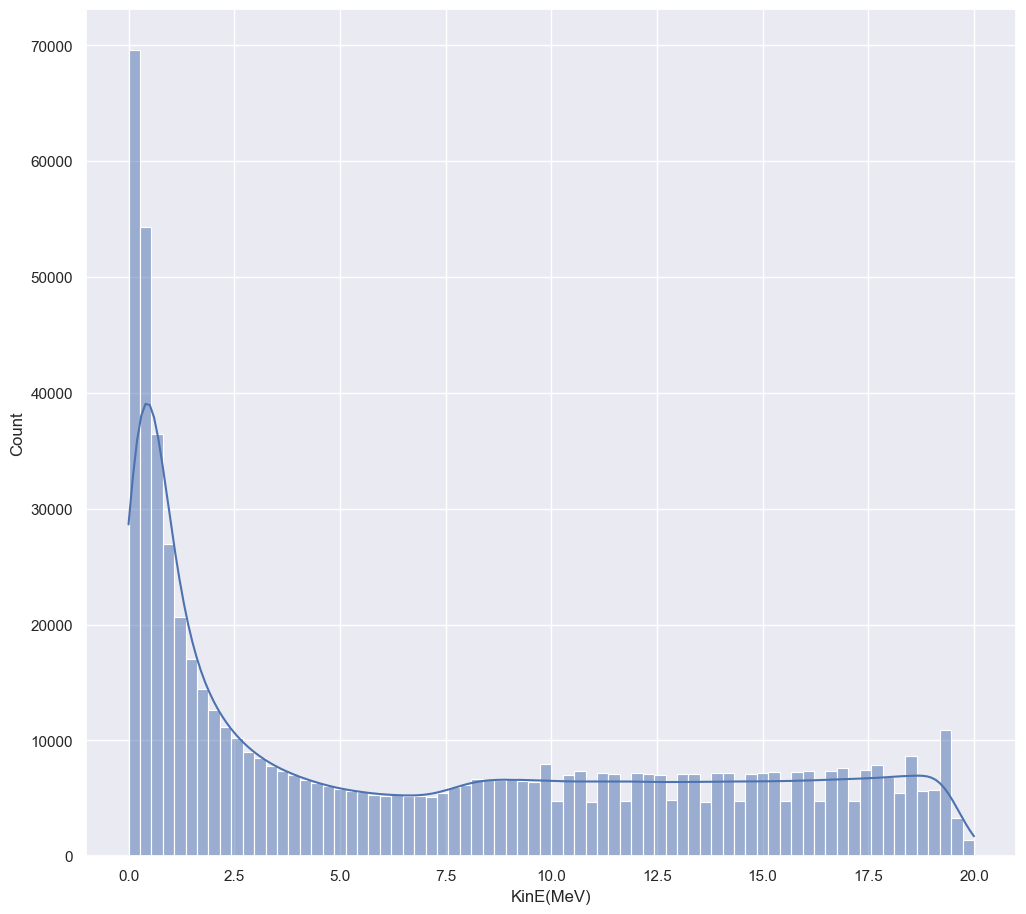

In [16]:
#Histoplot of KinE(MeV)
sns.histplot(data=dataplot, x="KinE(MeV)", kde=True)

<AxesSubplot:xlabel='StepLeng', ylabel='Count'>

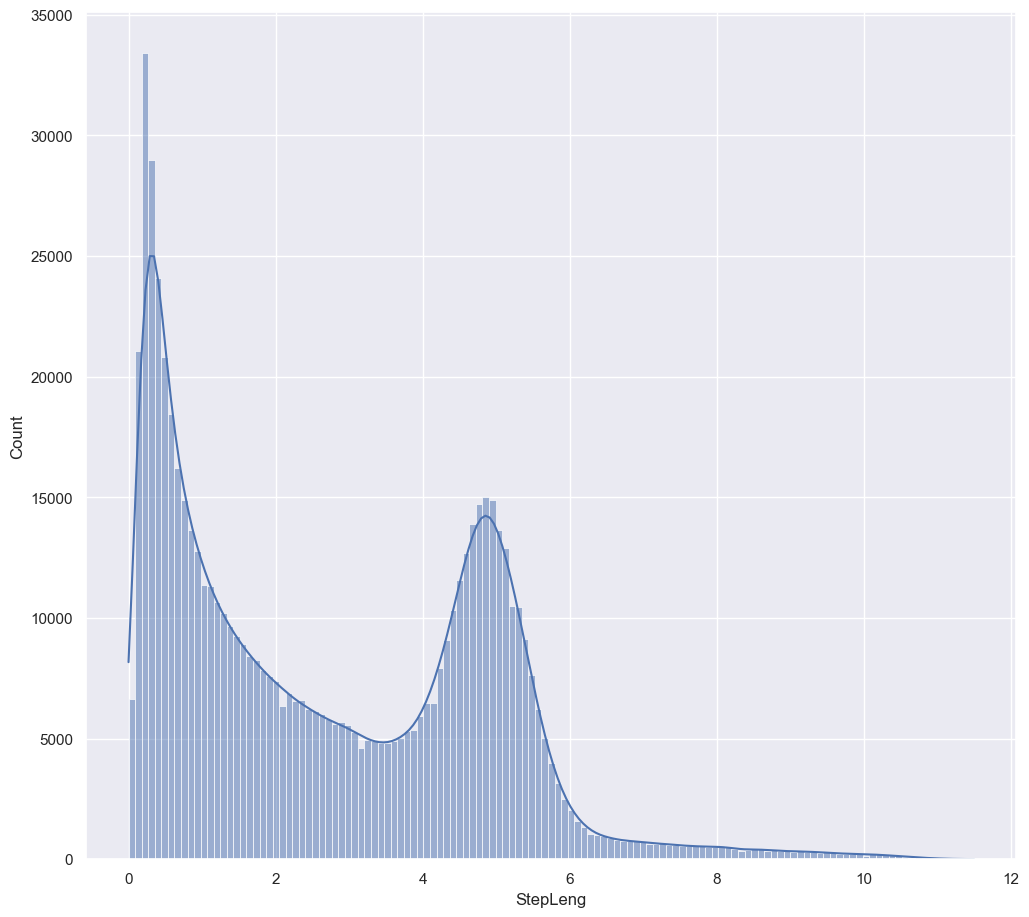

In [17]:
#Histoplot of StepLeng
sns.histplot(data=dataplot, x="StepLeng", kde=True)

<AxesSubplot:xlabel='DZ', ylabel='Count'>

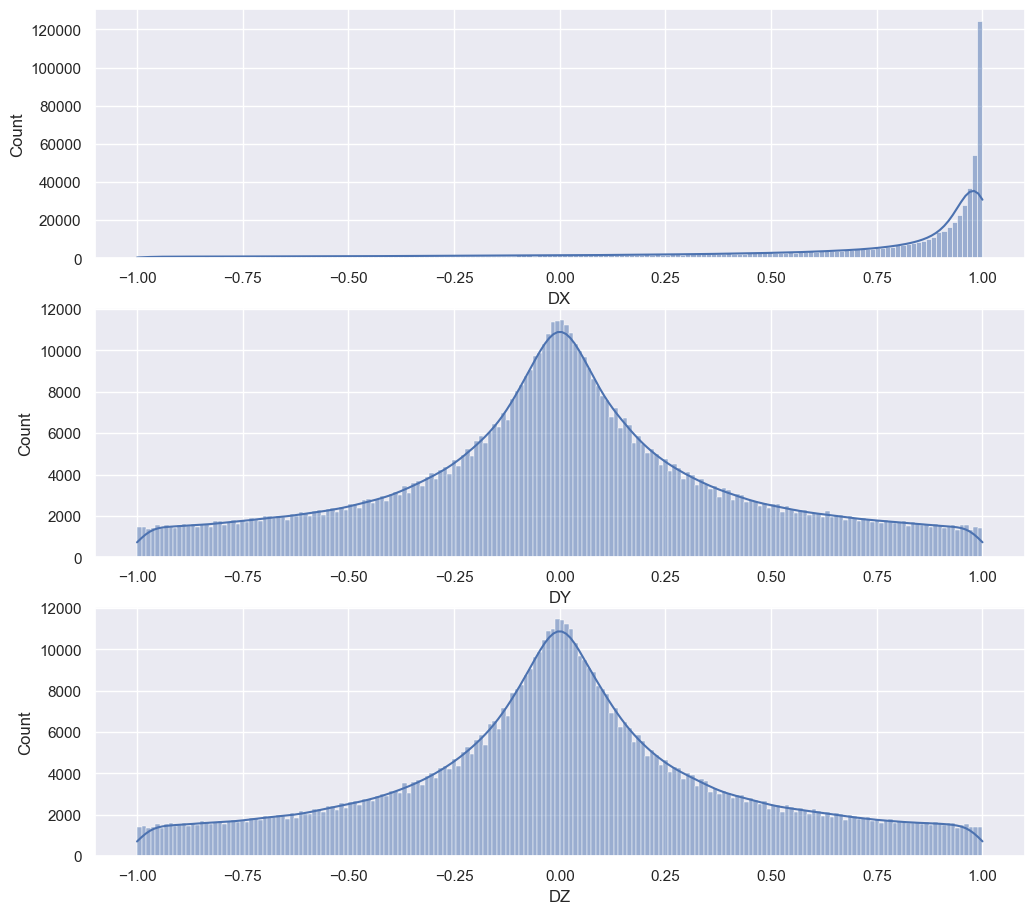

In [20]:
#Histoplot of DX, DY and DZ
fig,axes= plt.subplots(3, 1)
sns.histplot(data=dataplot, x="DX", kde=True,ax=axes[0])
sns.histplot(data=dataplot, x="DY", kde=True,ax=axes[1])
sns.histplot(data=dataplot, x="DZ", kde=True,ax=axes[2])

<AxesSubplot:xlabel='Z(mm)', ylabel='Count'>

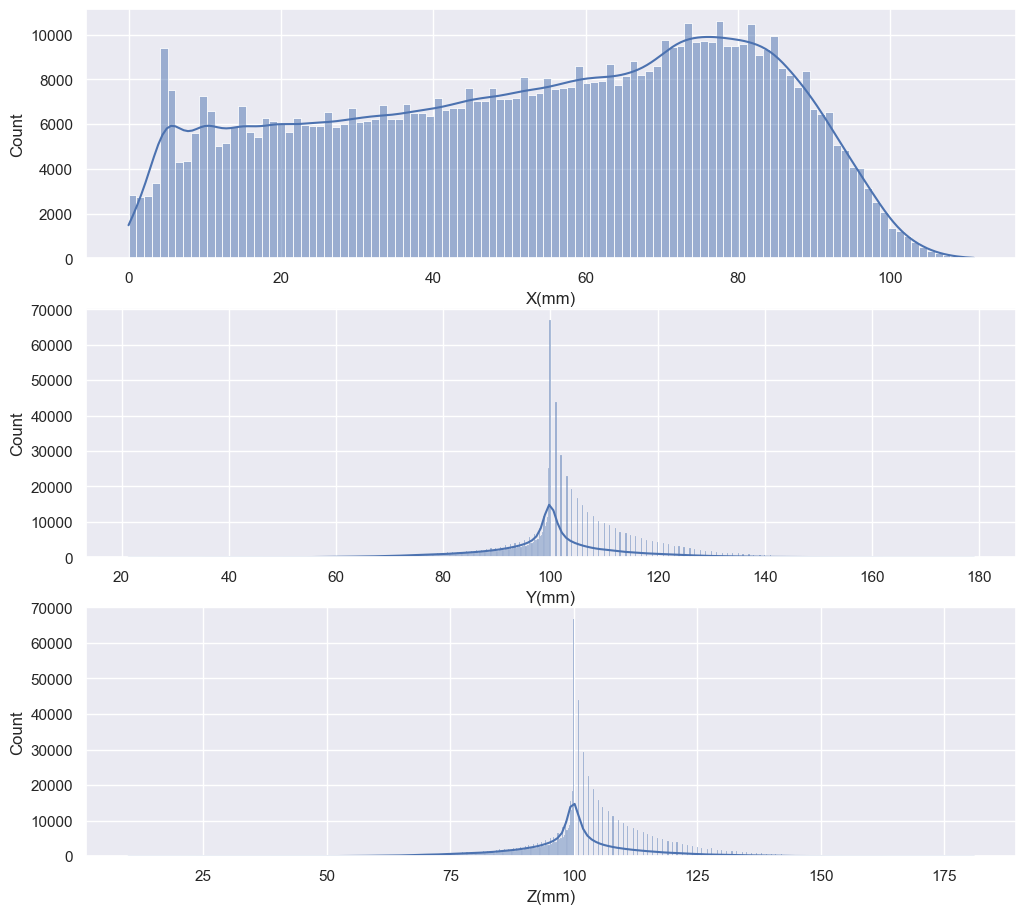

In [21]:
#Histoplot of X, Y and Z
fig,axes= plt.subplots(3, 1)
sns.histplot(data=dataplot, x="X(mm)", kde=True,ax=axes[0])
sns.histplot(data=dataplot, x="Y(mm)", kde=True,ax=axes[1])
sns.histplot(data=dataplot, x="Z(mm)", kde=True,ax=axes[2])

<AxesSubplot:xlabel='KinE(MeV)', ylabel='StepLeng'>

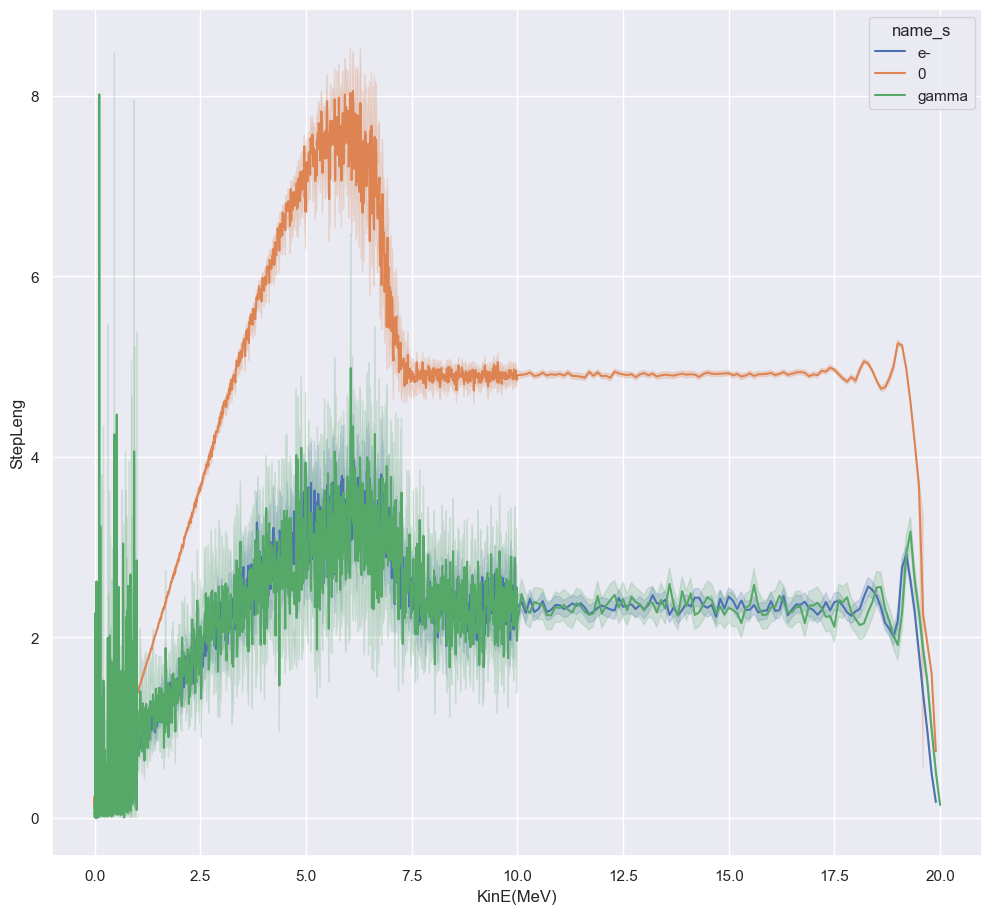

In [24]:
sns.lineplot(data=dataplot, x="KinE(MeV)", y="StepLeng",hue="name_s")

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Kin(MeV)_s'>

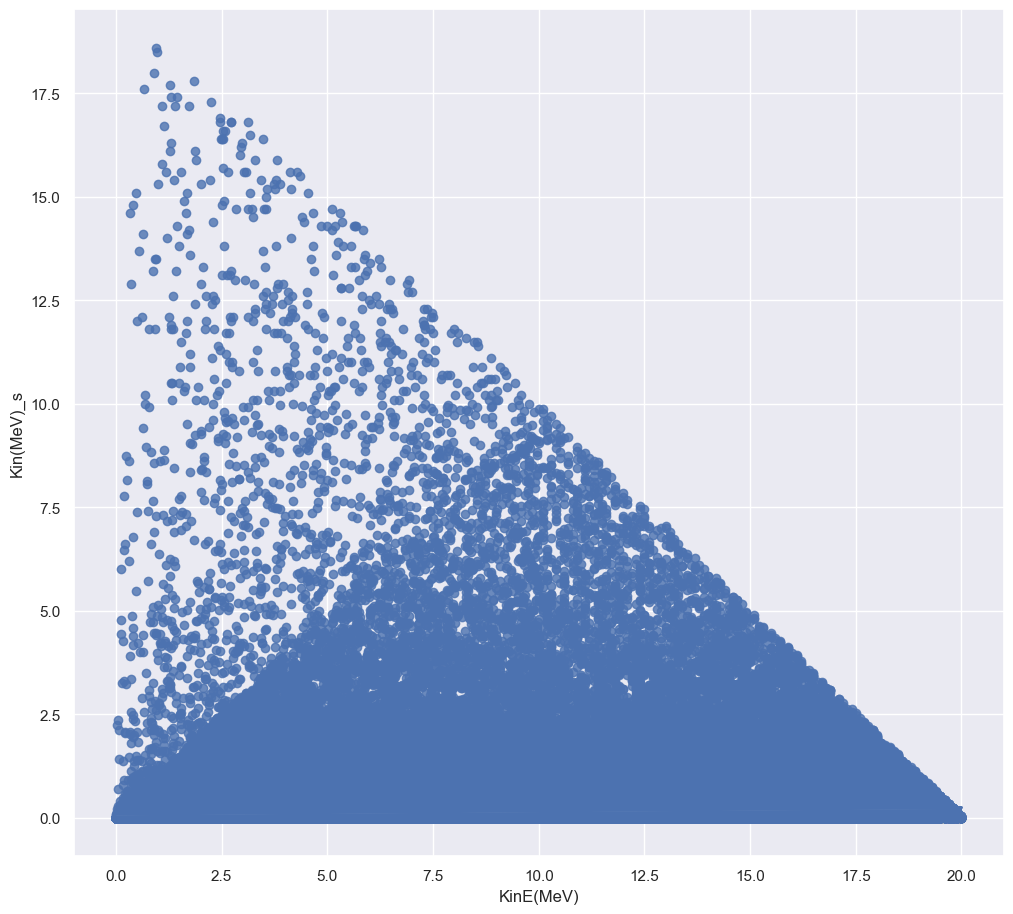

In [40]:
sns.regplot(data=dataplot, x="KinE(MeV)", y="Kin(MeV)_s")

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataplot_ = StandardScaler().fit_transform(dataplot_.iloc[:,:10])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataplot_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataplot[['name_s']]], axis = 1)
finalDf.head()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 'e-', 'gamma']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['name_s'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

pca.explained_variance_ratio_


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'